In [10]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import scipy.io as sio
import pandas as pd
import numpy as np

data=list(sio.loadmat('EmoPainData/randomised P/P33_D.mat').values())[-1]
data=data[:,:160]
num_coordinates=26
# normalize coordinates to 0-1 range
#data[:,:num_coordinates*3] = (data[:,:num_coordinates*3]-data[:,:num_coordinates*3].min())/(data[:,:num_coordinates*3].max()-data[:,:num_coordinates*3].min())

In [12]:
feature_description = pd.read_excel('EmoPainData/FAME - Dataset Column Descriptions.xlsx')
feature_names = feature_description['Description']+':'+feature_description['Anatomical Point'].astype('str')
feature_description=feature_description.drop(['Column Number', 'Description', 'Anatomical Point'], axis=1)
feature_description.insert(0, 'feature', feature_names)

In [13]:
df=pd.DataFrame(data, columns=feature_names)
# normalize the coordinates
df

,X-position:Hip,X-position:LeftUpperLeg,X-position:LeftLowerLeg,X-position:LeftAnkle,X-position:LeftHeel,X-position:LeftToes,X-position:RightUpperLeg,X-position:RightLowerLeg,X-position:RightAnkle,X-position:RightHeel,...,Joint Energy:Spine-Hip-RightLeg,Joint Energy:Left-Knee,Joint Energy:Right-Knee,Joint Energy:Left-Elbow,Joint Energy:Right-Elbow,Joint Energy:Left-Shoulder,Joint Energy:Right-Shoulder,Joint Energy:LeftShoulder-LeftUpperLeg-LeftLowerLeg,Joint Energy:RightShoulder-RightUpperLeg-RightLowerLeg,Joint Energy:Neck
0,-139.078941,-134.012779,-129.955922,-124.137809,-116.902529,-138.623961,-143.208967,-141.264565,-135.520829,-128.351649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-139.061093,-133.996065,-129.952493,-124.134380,-116.899100,-138.620532,-143.189974,-141.262592,-135.518855,-128.349675,...,0.000002,0.000208,0.000600,0.010060,0.136672,1.334650e-03,0.000008,9.693619e-05,8.420070e-07,0.000858
2,-139.060618,-134.000457,-129.973692,-124.155578,-116.920298,-138.641730,-143.181870,-141.262924,-135.519188,-128.350007,...,0.000188,0.000232,0.000147,0.004021,0.023545,3.077576e-04,0.000002,4.952526e-06,2.018533e-06,0.000002
3,-139.040542,-133.981667,-129.967063,-124.148951,-116.913670,-138.635102,-143.157198,-141.260897,-135.517161,-128.347981,...,0.000139,0.000648,0.001059,0.025718,0.019053,2.142692e-05,0.000325,5.030513e-05,3.381517e-05,0.001010
4,-139.025146,-133.956689,-129.942959,-124.124845,-116.889565,-138.610997,-143.150294,-141.258784,-135.515048,-128.345868,...,0.000340,0.000032,0.000046,0.038753,0.000852,1.932224e-03,0.000076,2.352215e-07,2.429566e-04,0.000567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15926,-5.090608,2.517142,4.552497,11.918333,16.219204,5.588511,-12.374233,-12.632848,-4.383833,3.151939,...,0.000113,0.001259,0.002470,0.000195,0.000050,1.133266e-04,0.001022,2.610735e-05,5.764380e-04,0.000056
15927,-5.116929,2.492791,4.533619,11.907963,16.209093,5.578071,-12.398975,-12.654038,-4.388370,3.149568,...,0.000086,0.000752,0.000741,0.000026,0.000988,1.048774e-05,0.001371,8.257636e-05,3.592835e-04,0.000419
15928,-5.128445,2.482166,4.523765,11.893915,16.195045,5.564023,-12.409778,-12.662953,-4.397284,3.142436,...,0.000018,0.000004,0.000008,0.000816,0.000455,3.969078e-04,0.001288,6.643996e-07,1.654882e-04,0.000643
15929,-5.150909,2.462200,4.517075,11.870820,16.171950,5.540926,-12.430247,-12.678235,-4.394789,3.145989,...,0.000138,0.002883,0.000781,0.001203,0.001191,1.702919e-07,0.001472,4.226252e-05,3.468324e-04,0.000577


In [31]:
combined_columns = {}
point_name=df.columns[0].split(':')[-1]
coordinate_names=['X-position:'+point_name, 'Y-position:'+point_name, 'Z-position:'+point_name]
group = df[coordinate_names]
#group.apply(np.array, axis=1)
combined_columns[point_name] = group.apply(np.array, axis=1)
pd.DataFrame(combined_columns)

,Hip
0,"[-139.078941, 104.291762, 112.787106]"
1,"[-139.061093, 104.292005, 112.788124]"
2,"[-139.060618, 104.296152, 112.789635]"
3,"[-139.040542, 104.300221, 112.790129]"
4,"[-139.025146, 104.305647, 112.782261]"
...,...
15926,"[-5.090608, 103.953324, 110.787277]"
15927,"[-5.116929, 103.955688, 110.817914]"
15928,"[-5.128445, 103.959893, 110.82864]"
15929,"[-5.150909, 103.959602, 110.855025]"


In [15]:
# Combine every 3 columns into one column of tuples
def combine_columns(df, num_points=26):
    combined_columns = {}
    # Iterate through groups of coordinates
    for i in range(0, num_points):
        point_name=df.columns[i].split(':')[-1]
        coordinate_names=['X-position:'+point_name, 'Y-position:'+point_name, 'Z-position:'+point_name]
        group = df[coordinate_names]
        combined_columns[point_name] = group.apply(np.array, axis=1)
    
    # Create a new DataFrame with combined columns
    return pd.DataFrame(combined_columns)

# Apply the function
result_df = combine_columns(df)

# Show the result
result_df

,Hip,LeftUpperLeg,LeftLowerLeg,LeftAnkle,LeftHeel,LeftToes,RightUpperLeg,RightLowerLeg,RightAnkle,RightHeel,...,LeftWrist,LeftFingertip,RightShoulder,RightUpperArm,RightArm,RightWrist,RightFingertip,Neck,Head,Crown
0,"[-139.078941, 104.291762, 112.787106]","[-134.01277880538362, 99.67956915012712, 123.1...","[-129.9559217166631, 60.524842208453656, 123.3...","[-124.13780912472618, 17.898747926641832, 119....","[-116.90252908011144, 11.47269744990984, 117.8...","[-138.62396089134126, 11.463182894757711, 125....","[-143.2089668445235, 99.21449355874164, 102.27...","[-141.26456478202715, 59.90161213296152, 101.6...","[-135.52082910585267, 17.120081125719366, 100....","[-128.3516489232274, 10.836314236551658, 98.11...",...,"[-124.92430135442127, 111.54023127515495, 133....","[-128.71170425485138, 98.6822409603617, 124.30...","[-137.42550546605014, 160.1446876895102, 98.64...","[-133.39630764739223, 154.69330540074503, 91.1...","[-124.01183599252899, 137.15446169807325, 68.1...","[-123.83437092520731, 113.55262135979521, 79.1...","[-123.13426536259827, 101.48383346567073, 89.9...","[-141.66039595852584, 166.31993238314854, 111....","[-143.43226148305422, 179.20084311048907, 111....","[-147.37201419106697, 194.12105081181156, 111...."
1,"[-139.061093, 104.292005, 112.788124]","[-133.99606513216386, 99.67963160946897, 123.1...","[-129.95249330446086, 60.52356829469973, 123.3...","[-124.1343799252567, 17.89747409446479, 119.65...","[-116.89909972904462, 11.471423728488686, 117....","[-138.62053173711632, 11.46190884721103, 125.1...","[-143.189973826182, 99.21491938777021, 102.272...","[-141.2625916998901, 59.90120366647122, 101.69...","[-135.51885532004647, 17.119672732389624, 100....","[-128.34967495759827, 10.835905920617364, 98.1...",...,"[-124.76273403470455, 111.62194208913189, 133....","[-128.66871192410215, 98.73770980261088, 124.2...","[-137.40749087949817, 160.1449481780584, 98.64...","[-133.37543805697825, 154.69645060989663, 91.1...","[-123.98811939883164, 137.15931111497372, 68.1...","[-123.81768491609468, 113.63107467894751, 79.3...","[-123.26102168437427, 101.54377383024962, 90.1...","[-141.642380057836, 166.32019290454357, 111.76...","[-143.41926219843015, 179.2003599594454, 111.5...","[-147.36868402908237, 194.118311445829, 111.93..."
2,"[-139.060618, 104.296152, 112.789635]","[-134.00045715911085, 99.68742512745874, 123.1...","[-129.97369152408248, 60.52966379737653, 123.3...","[-124.15557843747649, 17.903569663855926, 119....","[-116.92029828559451, 11.477519299298496, 117....","[-138.641730292416, 11.46800435786448, 125.162...","[-143.18186969153643, 99.21563297161165, 102.2...","[-141.2629242779596, 59.90150645088626, 101.69...","[-135.51918765753945, 17.119975553139312, 100....","[-128.35000710445195, 10.836208799383758, 98.1...",...,"[-124.72512173084327, 111.66451990253628, 133....","[-128.68622713135693, 98.77914768227662, 124.2...","[-137.42082677606442, 160.14869390586065, 98.6...","[-133.38802433879854, 154.70089533847957, 91.1...","[-123.9993101000615, 137.1645757274563, 68.160...","[-123.82858139518474, 113.66763093508887, 79.3...","[-123.35293002312639, 101.58558414131882, 90.1...","[-141.65494168839456, 166.3240643205828, 111.7...","[-143.42923144347785, 179.20464328669536, 111....","[-147.38610855823617, 194.12077154996928, 111...."
3,"[-139.040542, 104.300221, 112.790129]","[-133.98166705317644, 99.69475586141571, 123.1...","[-129.96706299781053, 60.535843829752906, 123....","[-124.1489505097231, 17.9097495678442, 119.685...","[-116.91367046958375, 11.483699086220003, 117....","[-138.6351023477608, 11.474184525435435, 125.1...","[-143.15719794186015, 99.2167271321161, 102.27...","[-141.26089748982994, 59.90151054735658, 101.6...","[-135.51716110436143, 17.119979607325263, 100....","[-128.34798065516358, 10.83621278740122, 98.11...",...,"[-124.59724067955736, 111.76088715848145, 133....","[-128.70042751316115, 98.90402330032411, 124.1...","[-137.4220476000944, 160.1517794049929, 98.628...","[-133.388621

In [51]:
# Prepare data for animation
p = {result_df.columns[i]:i for i in range(len(result_df.columns))}
coordinates = [np.array(result_df[col].tolist()) for col in result_df.columns]
coordinates = np.stack(coordinates)  # Shape: (num_groups, num_frames, 3)
num_frames = 540
coordinates=coordinates[:,:num_frames]  # first 10 seconds

In [47]:
coordinates.shape

(26, 540, 3)

In [52]:
p

{'Hip': 0,
 'LeftUpperLeg': 1,
 'LeftLowerLeg': 2,
 'LeftAnkle': 3,
 'LeftHeel': 4,
 'LeftToes': 5,
 'RightUpperLeg': 6,
 'RightLowerLeg': 7,
 'RightAnkle': 8,
 'RightHeel': 9,
 'RightToes': 10,
 'Spine': 11,
 'Spine 1': 12,
 'LeftShoulder': 13,
 'LeftUpperArm': 14,
 'LeftLowerArm': 15,
 'LeftWrist': 16,
 'LeftFingertip': 17,
 'RightShoulder': 18,
 'RightUpperArm': 19,
 'RightArm': 20,
 'RightWrist': 21,
 'RightFingertip': 22,
 'Neck': 23,
 'Head': 24,
 'Crown': 25}

In [ ]:
lines = [
    (p['Crown'], p['Head']),
    (p['Head'], p['Neck']),
    (p['Hip'], p['LeftUpperLeg']),  
    (p['Hip'], p['RightUpperLeg']),  
    (p[], p[]),  
    (p[], p[]), 
]

d:\PhD\PainAssessment\BodyMovement\.venv\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (d:\PhD\PainAssessment\BodyMovement\.venv\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


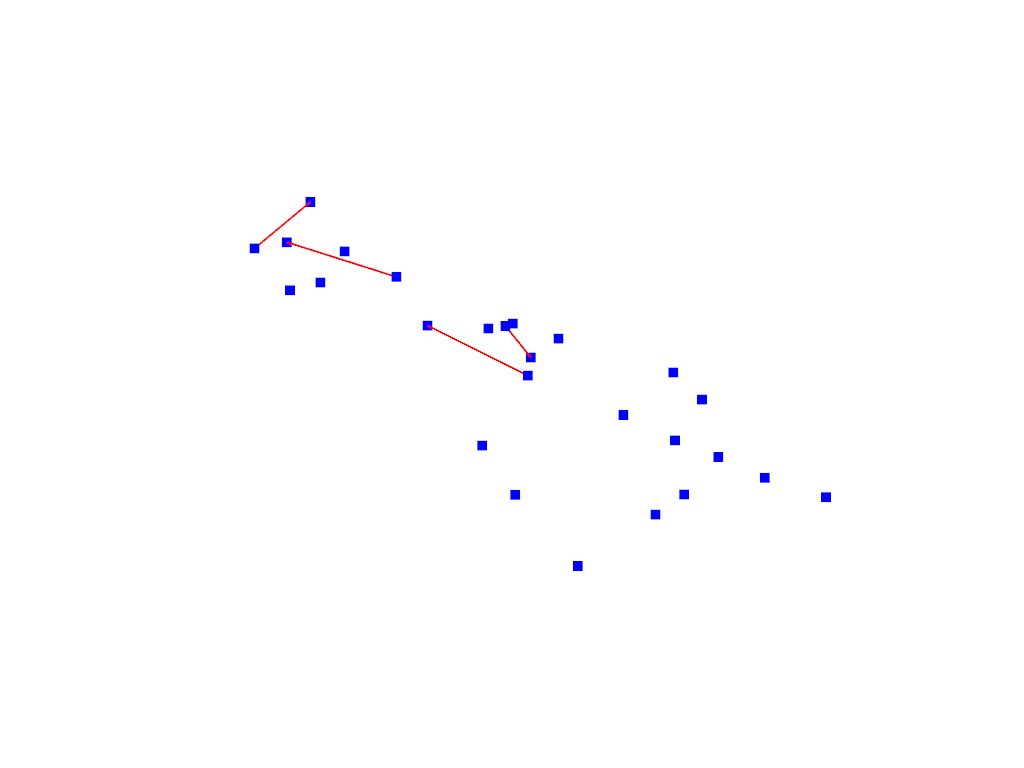

In [39]:
import pyvista as pv
import numpy as np

# Example large dataset: 26 points, 10,000 frames
num_points = 26
# Define lines to connect points (indices of the points to connect)
lines = [
    (0, 1),  # Connect point 0 to point 1
    (2, 3),  # Connect point 2 to point 3
    (4, 5),  # Connect point 4 to point 5
    (6, 7),  # Connect point 6 to point 7
]  # Add more pairs as needed

# Convert lines to PyVista format
line_segments = []
for line in lines:
    line_segments.append(len(line))  # Number of points in the line (always 2 here)
    line_segments.extend(line)      # Indices of points to connect

line_segments = np.array(line_segments)

# Initialize PyVista plotter
plotter = pv.Plotter()

# Create a point cloud
points = coordinates[:, 0, :]
point_cloud = pv.PolyData(coordinates[:, 0, :])
plotter.add_points(point_cloud, color="blue", point_size=10)

# Add lines connecting the points
poly_data = pv.PolyData()
poly_data.points = points
poly_data.lines = line_segments
plotter.add_mesh(poly_data, color="red", line_width=2)

# Update function for animation
def update(frame):
    # Update point positions
    point_cloud.points = coordinates[:, frame, :]  # Update point positions
    plotter.update()
    # Update line positions
    poly_data.points = coordinates[:, frame, :]
    plotter.update()

# Start animation
plotter.open_movie("3d_animation.mp4", 54)  # Optional: Save as MP4
plotter.show(auto_close=False)
for frame in range(num_frames):
    update(frame)
    plotter.write_frame()  # Write each frame to the movie
plotter.close()

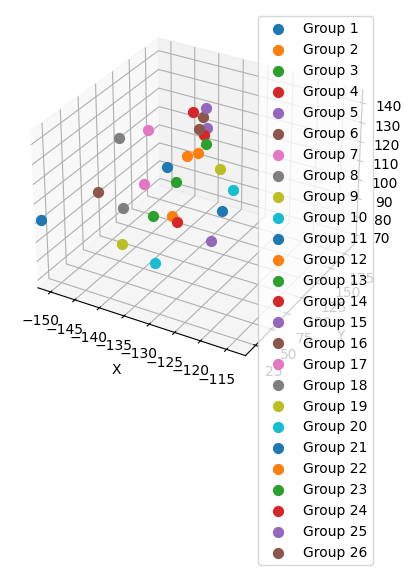

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Animation setup
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot objects for each group
scatters = [
    ax.scatter([], [], [], s=50, label=f"Group {i+1}")
    for i in range(coordinates.shape[0])
]

def init():
    """Initialize the 3D plot limits and labels."""
    ax.set_xlim(np.min(coordinates[:, :, 0]) - 1, np.max(coordinates[:, :, 0]) + 1)
    ax.set_ylim(np.min(coordinates[:, :, 1]) - 1, np.max(coordinates[:, :, 1]) + 1)
    ax.set_zlim(np.min(coordinates[:, :, 2]) - 1, np.max(coordinates[:, :, 2]) + 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    return scatters

def update(frame):
    """Update the scatter plot for each group."""
    for i, scat in enumerate(scatters):
        x, y, z = coordinates[i, frame, :]
        scat._offsets3d = ([x], [y], [z])  # Update the position of the point
    return scatters

# Create the animation

ani = FuncAnimation(fig, update, frames=coordinates.shape[1], init_func=init, blit=False, interval=1000/54)
#ani.save("3d_animation.mp4", writer='ffmpeg', fps=54)
f = r"animation2.gif" 
writergif = animation.PillowWriter(fps=54) 
ani.save(f, writer=writergif)
plt.show()

In [23]:
import matplotlib
print(matplotlib.animation.writers.list())

['pillow', 'html']
